In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc = {'figure.figsize':(10,8)})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_excel("marketing_campaign.xlsx")

In [3]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
pd.isnull(df).sum()
df = df.drop(labels=df[df['Income'].isnull()].index.tolist(), axis=0)

In [5]:
df['Education'].replace(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'],
                        [1, 2, 3, 4, 5], inplace=True)
df['Marital_Status'].replace(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO'], 
                        [2, 0, 3, 1, 0, 1, 4, 6], inplace=True)

In [6]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,3,0,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,3,0,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,3,1,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,3,1,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,5,1,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,3,1,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,5,1,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,3,3,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,4,1,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [65]:
X = df.drop(['Response', 'Dt_Customer', 'ID'], axis=1)
y = df['Response']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [31]:
from sklearn.svm import SVC

In [32]:
model = SVC()

In [33]:
model.fit(X_train, y_train)

SVC()

In [34]:
PredictionSVM = model.predict(X_test)

In [35]:
print(confusion_matrix(y_test, PredictionSVM))

[[478   0]
 [ 76   0]]


In [27]:
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"


In [71]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [39]:
from sklearn.metrics import f1_score
f1_score(y_test, PredictionSVM, labels=np.unique(PredictionSVM))

0.0

In [37]:
PredictionSVM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
print(classification_report(y_test, PredictionSVM))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       478
           1       0.00      0.00      0.00        76

    accuracy                           0.86       554
   macro avg       0.43      0.50      0.46       554
weighted avg       0.74      0.86      0.80       554



C:\Users\yashy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\yashy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\yashy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [45]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [46]:
X_train_roc, X_test_roc, y_train_roc, y_test_roc = train_test_split(X, y, test_size=0.25)

In [47]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print("Number of records After Over Sampling")
print(sorted(Counter(y_train_ros).items()))

Number of records After Over Sampling
[(0, 1405), (1, 1405)]


In [48]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_ros, y_train_ros)
PredictionSVM = model.predict(X_test)
print(confusion_matrix(y_test, PredictionSVM))

[[394  84]
 [ 45  31]]


In [49]:
print(classification_report(y_test, PredictionSVM))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       478
           1       0.27      0.41      0.32        76

    accuracy                           0.77       554
   macro avg       0.58      0.62      0.59       554
weighted avg       0.81      0.77      0.79       554



In [52]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1,0.1, 0.01, 0.001, 0.0001]}

In [55]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [56]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.844 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.844 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.846 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.846 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.846 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.844 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.844 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.846 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.846 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.846 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.844 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 3/5] END ...................C=1000, gamma=1;, score=0.852 total time=   0.0s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.849 total time=   0.0s
[CV 5/5] END ...................C=1000, gamma=1;, score=0.858 total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.865 total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.1;, score=0.856 total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.852 total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.1;, score=0.849 total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.858 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.865 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.856 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.852 total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.849 total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [57]:
grid.best_params_

{'C': 10, 'gamma': 0.001}

In [58]:
grid.best_estimator_

SVC(C=10, gamma=0.001)

In [59]:
grid_predictions = grid.predict(X_test)

In [62]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test, grid_predictions))

[[477   1]
 [ 73   3]]


              precision    recall  f1-score   support

           0       0.87      1.00      0.93       478
           1       0.75      0.04      0.07        76

    accuracy                           0.87       554
   macro avg       0.81      0.52      0.50       554
weighted avg       0.85      0.87      0.81       554



In [73]:
from sklearn.inspection import permutation_importance

Text(0.5, 0, 'Permutation Importance')

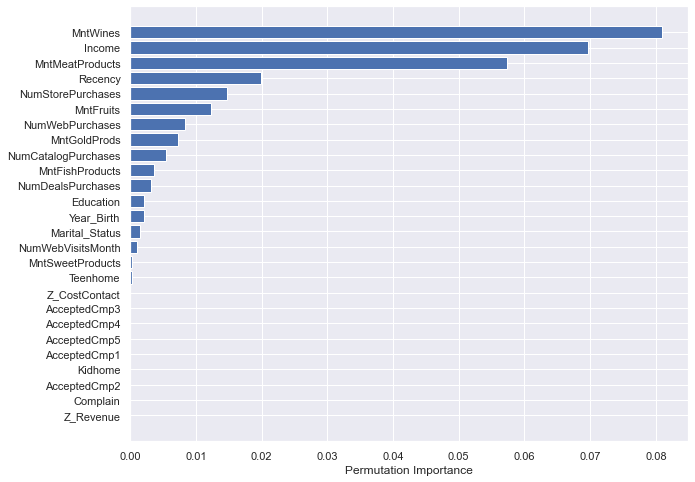

In [76]:
svc =  SVC(kernel='linear', C=10)
svc.fit(X_train, y_train)

perm_importance = permutation_importance(svc, X_test, y_test)

feature_names = X.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")